<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [8]:
genders = data.groupby('sex')['sex'].count()
genders.head()

sex
Female    10771
Male      21790
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [10]:
avg_female_age = data['age'][data['sex']=='Female'].mean()
print('Average age of females is:', round(avg_female_age, 2))

Average age of females is: 36.86


**3. Какова доля граждан Германии (признак *native-country*)?**

In [14]:
print('Percent of german people is:',
      round(data[data['native-country']=='Germany'].shape[0]/data.shape[0]*100, 2))

Percent of german people is: 0.42


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

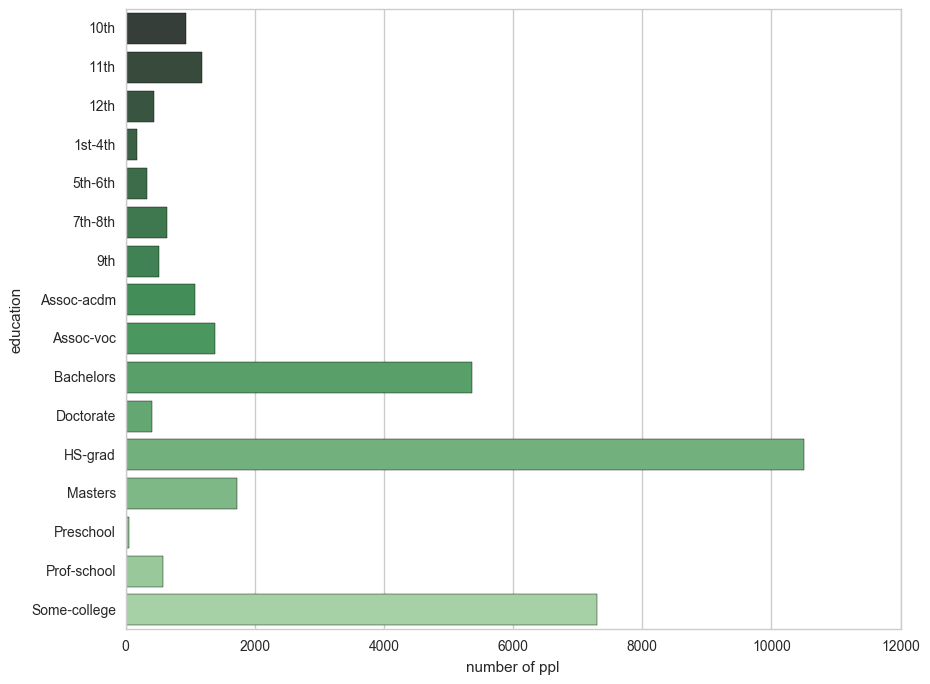

In [92]:
sns.set_style("whitegrid")
tmp = pd.DataFrame(data.groupby(['education'])['age'].count())
tmp.reset_index(inplace=True)
fig = sns.barplot(y="education",
                  x='age',
                  data=tmp,
                  palette="Greens_d")
fig.set(ylabel='education', xlabel='number of ppl')
plt.show()

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [22]:
tmp1 = data['age'][data['salary']=='>50K']
tmp2 = data['age'][data['salary']=='<=50K']
print('Mean and std age of people with salary >50k is:',
      round(tmp1.mean(), 0), '+-', round(tmp1.std(), 1))
print('Mean and std age of people with salary <=50k is:',
      round(tmp2.mean(), 0), '+-', round(tmp2.std(), 1))

Mean and std age of people with salary >50k is: 44.0 +- 10.5
Mean and std age of people with salary <=50k is: 37.0 +- 14.0


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [27]:
tmp = data['education'][data['salary']=='>50K'].unique()
high_edu = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
for i, item in enumerate(tmp):
    if item not in high_edu:
        print(item, 'is not higher education!')

HS-grad is not higher education!
Some-college is not higher education!
7th-8th is not higher education!
12th is not higher education!
10th is not higher education!
11th is not higher education!
9th is not higher education!
5th-6th is not higher education!
1st-4th is not higher education!


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [29]:
tmp = data.groupby('race')['age'].max()
tmp.head()

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married*, остальных считаем холостыми.**

In [63]:
def marital_status_short(marital_status):
    if marital_status[:7]=='Married':
        return 'Married'
    else:
        return 'Non-married'

data['marital_status_short'] = data.apply(lambda row: marital_status_short(row['marital-status']), axis=1)
print(pd.crosstab(data['marital_status_short'], data['salary'], normalize=True))
del data['marital_status_short']

salary                   <=50K      >50K
marital_status_short                    
Married               0.266607  0.206873
Non-married           0.492583  0.033936


In [59]:
max_hours_per_week = data['hours-per-week'].max()
print('Max hours per week is:', max_hours_per_week)
n_ppl_with_max_hours_per_week = data[data['hours-per-week']==max_hours_per_week].shape[0]
print('Number of people working', max_hours_per_week, 'hours is', n_ppl_with_max_hours_per_week)
percent_of_ppl_with_big_salary = round(data[(data['hours-per-week']==max_hours_per_week) \
                                      & (data['salary']=='>50K')].shape[0]/ \
                                 n_ppl_with_max_hours_per_week*100, 0)
print('Percent of people with >50K salary working',
      max_hours_per_week,
      'hours is',
      percent_of_ppl_with_big_salary)

Max hours per week is: 99
Number of people working 99 hours is 85
Percent of people with >50K salary working 99 hours is 29.0


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих много и мало (*salary*) для каждой страны (*native-country*).**

In [67]:
data.pivot_table(values='hours-per-week',
                 columns='native-country',
                 index='salary',
                 aggfunc='mean')['Japan']

salary
<=50K    41.000000
>50K     47.958333
Name: Japan, dtype: float64